In [219]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from sklearn import tree
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [220]:
def scaleData(dataFrame,flag):
    df = dataFrame.copy()

    for var in df:
        mean = df[var].mean()
        std = df[var].std()
        l1 = (df[var].abs()).sum()

        if(flag == 1):
            df[var] = (df[var]-mean)/std
        else:
            df[var] = df[var]/l1

    return df


In [221]:
dfProbeA = pd.read_csv('./UKSA/probeA.csv', header = 0)
dfProbeB = pd.read_csv('./UKSA/probeB.csv', header = 0)
dfClassA = pd.read_csv('./UKSA/classA.csv', header = 0)

#print (dfProbeA)
#print (scDfProbeA)
#print (dfProbeB)
#print (dfClassA)

In [222]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [223]:
def crossValidation(k,dataFrame, dataFrameTarget, order):
    #kf contains indices of instances in each fold - use KFold to split
    kf = KFold(len(dataFrame),k)
    sum_accuracy = 0
    probArray = []
    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
    for train, test in kf:
        trainingDf = dataFrame.iloc[train].copy()
        testingDf = dataFrame.iloc[test].copy()
        trainingDfTarget = dataFrameTarget.iloc[train].copy()
        testingDfTarget = dataFrameTarget.iloc[test].copy()

        #training = training.drop(8, 1)
        
        trainingDf = scaleData(trainingDf,1)
        testingDf = scaleData(testingDf, 1)

        target = trainingDfTarget.as_matrix()
        training = trainingDf.as_matrix()
        testingTarget = testingDfTarget.as_matrix()
        testing = testingDf.as_matrix()
        target = target.squeeze()
        
        knn_model = KNeighborsClassifier(n_neighbors=order)
        knn_model.fit(training, target)
        
        predictVal = ((knn_model.predict(testing)))
        predictProb =  knn_model.predict_proba(testing)
        confusion = metrics.confusion_matrix(testingTarget, predictVal)
        #print (confusion)
        TP = confusion[1,1]
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        #print (TN/float(TN+FP))

        #print (metrics.recall_score(testingTarget, predictVal))
        y_pred_prob = knn_model.predict_proba(testing)[:, 1]
        
        auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
        sum_accuracy = sum_accuracy + auc
        
        
    return sum_accuracy/k

In [224]:
#dfScProbeA = scaleData(dfProbeA, 1)
#print (crossValidation(5, dfProbeA, dfClassA, 1))
dfProbeA = dfProbeA.drop('TNA', 1)


In [225]:
max = 0
xTrue = 0
for index, x in enumerate(range(1, 50)):
    totalTemp = 0
    numberIter = 0
    suspectK = x
    for index2, i in enumerate(range(5, 100)):
        temp = crossValidation(i, dfProbeA, dfClassA, x)
        totalTemp = totalTemp+temp
        numberIter = index2
    numberIter = numberIter+1
    print (x, numberIter, totalTemp/numberIter)
    if (totalTemp/numberIter) > max:
        max = totalTemp/numberIter
        xTrue = suspectK
    
print (xTrue, max)

1 95 0.725476650515
2 95 0.78438574028
3 95 0.809583191114
4 95 0.822225353145
5 95 0.833528628112
6 95 0.840637576764
7 95 0.84693836329
8 95 0.852092837524
9 95 0.855679539328
10 95 0.858944745471
11 95 0.862165600714
12 95 0.863950880038
13 95 0.865824536154
14 95 0.867980964098
15 95 0.868702169403
16 95 0.869885821117
17 95 0.871149647905
18 95 0.872548114256
19 95 0.873369694493
20 95 0.874288779946
21 95 0.874960922307
22 95 0.875654090717
23 95 0.875682501341
24 95 0.876399638193
25 95 0.876700072255
26 95 0.876887983068
27 95 0.877235172334
28 95 0.877315727366
29 95 0.878034450156
30 95 0.877874908953
31 95 0.877904902171
32 95 0.87824254737
33 95 0.878373078946
34 95 0.878472681912
35 95 0.878875406451
36 95 0.87886295683
37 95 0.878931306423
38 95 0.879089397666
39 95 0.879005030485
40 95 0.87897095264
41 95 0.87916847963
42 95 0.879491904754
43 95 0.879594329557
44 95 0.879353453772
45 95 0.879197474235
46 95 0.879620904867
47 95 0.879633030629
48 95 0.879718648366
49 95 0

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.859655195148


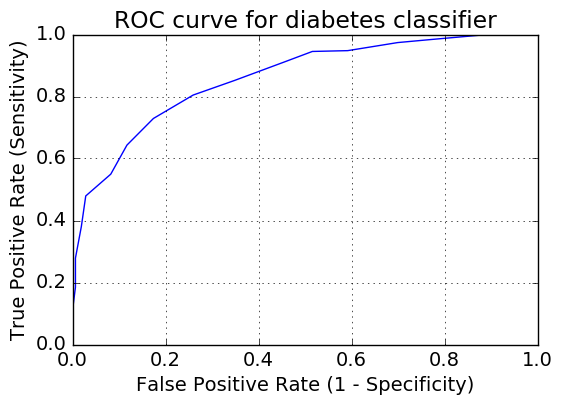

In [248]:
from sklearn.cross_validation import train_test_split
dfScProbeA = scaleData(dfProbeA, 1)
X_train, X_test, y_train, y_test = train_test_split(dfScProbeA, dfClassA, test_size = .7, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=30)
X_train = scaleData(X_train,1)
x_test = scaleData(X_test,1)

knn_model.fit(X_train, y_train)

predictVal = ((knn_model.predict(X_test)))
confusion = metrics.confusion_matrix(y_test, predictVal)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
        
auc = (metrics.roc_auc_score(y_test, y_pred_prob))
print (auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [87]:
def crossValidationDtree(k,dataFrame, dataFrameTarget, order):
    #kf contains indices of instances in each fold - use KFold to split
    kf = KFold(len(dataFrame),k)
    sum_accuracy = 0
    probArray = []
    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
    for train, test in kf:
        trainingDf = dataFrame.iloc[train].copy()
        testingDf = dataFrame.iloc[test].copy()
        trainingDfTarget = dataFrameTarget.iloc[train].copy()
        testingDfTarget = dataFrameTarget.iloc[test].copy()

        #training = training.drop(8, 1)
        
        trainingDf = scaleData(trainingDf,1)
        testingDf = scaleData(testingDf, 1)

        target = trainingDfTarget.as_matrix()
        training = trainingDf.as_matrix()
        testingTarget = testingDfTarget.as_matrix()
        testing = testingDf.as_matrix()
        target = target.squeeze()
        
        knn_model = KNeighborsClassifier(n_neighbors=order)
        knn_model.fit(training, target)
        
        predictVal = ((knn_model.predict(testing)))
        predictProb =  knn_model.predict_proba(testing)
        confusion = metrics.confusion_matrix(testingTarget, predictVal)
        #print (confusion)
        TP = confusion[1,1]
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        #print (TN/float(TN+FP))

        #print (metrics.recall_score(testingTarget, predictVal))
        y_pred_prob = knn_model.predict_proba(testing)[:, 1]
        
        auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
        sum_accuracy = sum_accuracy + auc
        break
        
    return sum_accuracy/k

25 5


[[175  49]
 [ 37 239]]
0.823596014493


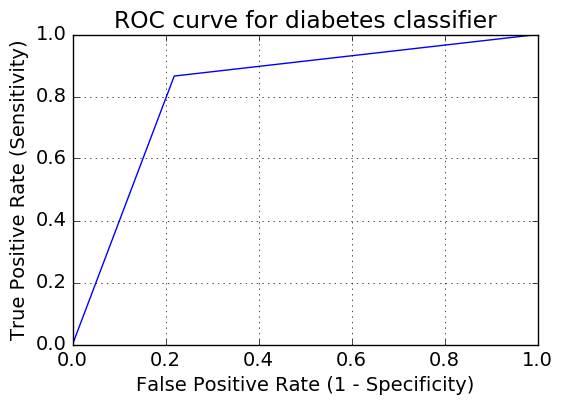

In [162]:
dTree = tree.DecisionTreeClassifier()
dTree.fit(X_train, y_train)

predictVal = dTree.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predictVal)
y_pred_prob = dTree.predict_proba(X_test)[:, 1]
print(confusion)
auc = (metrics.roc_auc_score(y_test, y_pred_prob))
print (auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)